In [3]:
!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')


Defaulting to user installation because normal site-packages is not writeable


In [4]:
df=pd.read_csv('Dry_Eye_Dataset (1).xls')
df

Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0          F   24             9.5              2             1         137/89   
1          M   39             9.6              2             3         108/64   
2          F   45             5.4              1             5         134/81   
3          F   45             5.4              4             5         110/90   
4          F   42             5.7              3             2          99/67   
...      ...  ...             ...            ...           ...            ...   
19995      M   26             9.4              2             3         132/64   
19996      F   39             7.3              3             4         101/75   
19997      F   20             8.0              5             3         124/63   
19998      M   38             4.5              3             3         136/70   
19999      M   37             5.0              5             3          96/90   

       Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0              67         3000                 31     161  ...        N   
1              60        12000                 74     164  ...        N   
2              95        12000                 93     179  ...        N   
3              78        19000                 32     160  ...        N   
4              72         4000                173     179  ...        N   
...           ...          ...                ...     ...  ...      ...   
19995          91        20000                 88     200  ...        Y   
19996          65         2000                 53     195  ...        N   
19997          78        10000                 17     186  ...        Y   
19998          60         3000                115     170  ...        Y   
19999          73        13000                 57     188  ...        N   

      Medical issue Ongoing medication Smart device before bed  \
0                 Y                  Y                       N   
1                 Y                  Y                       N   
2                 N                  N                       Y   
3                 Y                  N                       N   
4                 Y                  N                       N   
...             ...                ...                     ...   
19995             Y                  Y                       Y   
19996             Y                  Y                       N   
19997             Y                  N                       N   
19998             N                  Y                       N   
19999             Y                  Y                       Y   

      Average screen time Blue-light filter Discomfort Eye-strain  \
0                     8.7                 N                     Y   
1                     9.6                 Y                     N   
2                     4.0                 N                     Y   
3                     7.6                 N                     Y   
4                     3.5                 N                     Y   
...                   ...               ...                   ...   
19995                 3.8                 N                     Y   
19996                 3.8                 N                     N   
19997                 8.4                 N                     N   
19998                 2.2                 N                     N   
19999                 4.2                 Y                     N   

      Redness in eye Itchiness/Irritation in eye Dry Eye Disease  
0                  Y                           N               Y  
1                  N                           Y               Y  
2                  N                           N               N  
3                  N                           Y               N  
4                  Y                           N               Y  
...              ...                         ...             ...  
19995              N                     

In [5]:
df.shape

(20000, 26)

In [6]:
df.isna().sum()

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [9]:
df.dtypes

Gender                          object
Age                              int64
Sleep duration                 float64
Sleep quality                    int64
Stress level                     int64
Blood pressure                  object
Heart rate                       int64
Daily steps                      int64
Physical activity                int64
Height                           int64
Weight                           int64
Sleep disorder                  object
Wake up during night            object
Feel sleepy during day          object
Caffeine consumption            object
Alcohol consumption             object
Smoking                         object
Medical issue                   object
Ongoing medication              object
Smart device before bed         object
Average screen time            float64
Blue-light filter               object
Discomfort Eye-strain           object
Redness in eye                  object
Itchiness/Irritation in eye     object
Dry Eye Disease          

In [10]:
df.isna().sum()/df.shape[0]*100

Gender                         0.0
Age                            0.0
Sleep duration                 0.0
Sleep quality                  0.0
Stress level                   0.0
Blood pressure                 0.0
Heart rate                     0.0
Daily steps                    0.0
Physical activity              0.0
Height                         0.0
Weight                         0.0
Sleep disorder                 0.0
Wake up during night           0.0
Feel sleepy during day         0.0
Caffeine consumption           0.0
Alcohol consumption            0.0
Smoking                        0.0
Medical issue                  0.0
Ongoing medication             0.0
Smart device before bed        0.0
Average screen time            0.0
Blue-light filter              0.0
Discomfort Eye-strain          0.0
Redness in eye                 0.0
Itchiness/Irritation in eye    0.0
Dry Eye Disease                0.0
dtype: float64

In [11]:
df.head()

Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   

   Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0          67         3000                 31     161  ...        N   
1          60        12000                 74     164  ...        N   
2          95        12000                 93     179  ...        N   
3          78        19000                 32     160  ...        N   
4          72         4000                173     179  ...        N   

  Medical issue Ongoing medication Smart device before bed  \
0             Y                  Y                       N   
1             Y                  Y                       N   
2             N                  N                       Y   
3             Y                  N                       N   
4             Y                  N                       N   

  Average screen time Blue-light filter Discomfort Eye-strain Redness in eye  \
0                 8.7                 N                     Y              Y   
1                 9.6                 Y                     N              N   
2                 4.0                 N                     Y              N   
3                 7.6                 N                     Y              N   
4                 3.5                 N                     Y              Y   

  Itchiness/Irritation in eye Dry Eye Disease  
0                           N               Y  
1                           Y               Y  
2                           N               N  
3                           Y               N  
4                           N               Y  

[5 rows x 26 columns]

In [12]:
df.tail()

Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
19995      M   26             9.4              2             3         132/64   
19996      F   39             7.3              3             4         101/75   
19997      F   20             8.0              5             3         124/63   
19998      M   38             4.5              3             3         136/70   
19999      M   37             5.0              5             3          96/90   

       Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
19995          91        20000                 88     200  ...        Y   
19996          65         2000                 53     195  ...        N   
19997          78        10000                 17     186  ...        Y   
19998          60         3000                115     170  ...        Y   
19999          73        13000                 57     188  ...        N   

      Medical issue Ongoing medication Smart device before bed  \
19995             Y                  Y                       Y   
19996             Y                  Y                       N   
19997             Y                  N                       N   
19998             N                  Y                       N   
19999             Y                  Y                       Y   

      Average screen time Blue-light filter Discomfort Eye-strain  \
19995                 3.8                 N                     Y   
19996                 3.8                 N                     N   
19997                 8.4                 N                     N   
19998                 2.2                 N                     N   
19999                 4.2                 Y                     N   

      Redness in eye Itchiness/Irritation in eye Dry Eye Disease  
19995              N                           Y               Y  
19996              Y                           N               Y  
19997              Y                           N               N  
19998              N                           Y               Y  
19999              N                           N               N  

[5 rows x 26 columns]

In [13]:
df.columns

Index(['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Blood pressure', 'Heart rate', 'Daily steps', 'Physical activity',
       'Height', 'Weight', 'Sleep disorder', 'Wake up during night',
       'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption',
       'Smoking', 'Medical issue', 'Ongoing medication',
       'Smart device before bed', 'Average screen time', 'Blue-light filter',
       'Discomfort Eye-strain', 'Redness in eye',
       'Itchiness/Irritation in eye', 'Dry Eye Disease'],
      dtype='object')

In [14]:
df.describe().T

count          mean          std     min     25%  \
Age                  20000.0     31.422800     8.103717    18.0    24.0   
Sleep duration       20000.0      6.998245     1.731723     4.0     5.5   
Sleep quality        20000.0      2.997250     1.412283     1.0     2.0   
Stress level         20000.0      2.993750     1.407235     1.0     2.0   
Heart rate           20000.0     79.912200    11.808279    60.0    70.0   
Daily steps          20000.0  10536.900000  5752.729186  1000.0  6000.0   
Physical activity    20000.0     90.069750    52.317283     0.0    45.0   
Height               20000.0    174.865900    14.719903   150.0   162.0   
Weight               20000.0     74.891850    14.733839    50.0    62.0   
Average screen time  20000.0      5.519885     2.606305     1.0     3.3   

                         50%      75%      max  
Age                     31.0     39.0     45.0  
Sleep duration           7.0      8.5     10.0  
Sleep quality            3.0      4.0      5.0  
Stress level             3.0      4.0      5.0  
Heart rate              80.0     90.0    100.0  
Daily steps          11000.0  16000.0  20000.0  
Physical activity       91.0    135.0    180.0  
Height                 175.0    188.0    200.0  
Weight                  75.0     88.0    100.0  
Average screen time      5.5      7.8     10.0

# EDA

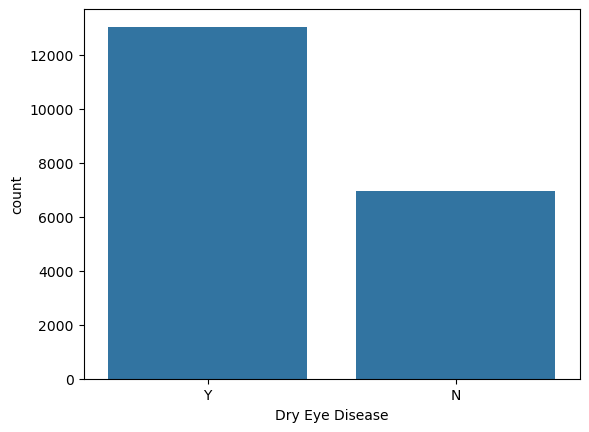

In [15]:
sns.countplot(data=df,x='Dry Eye Disease')
plt.show()

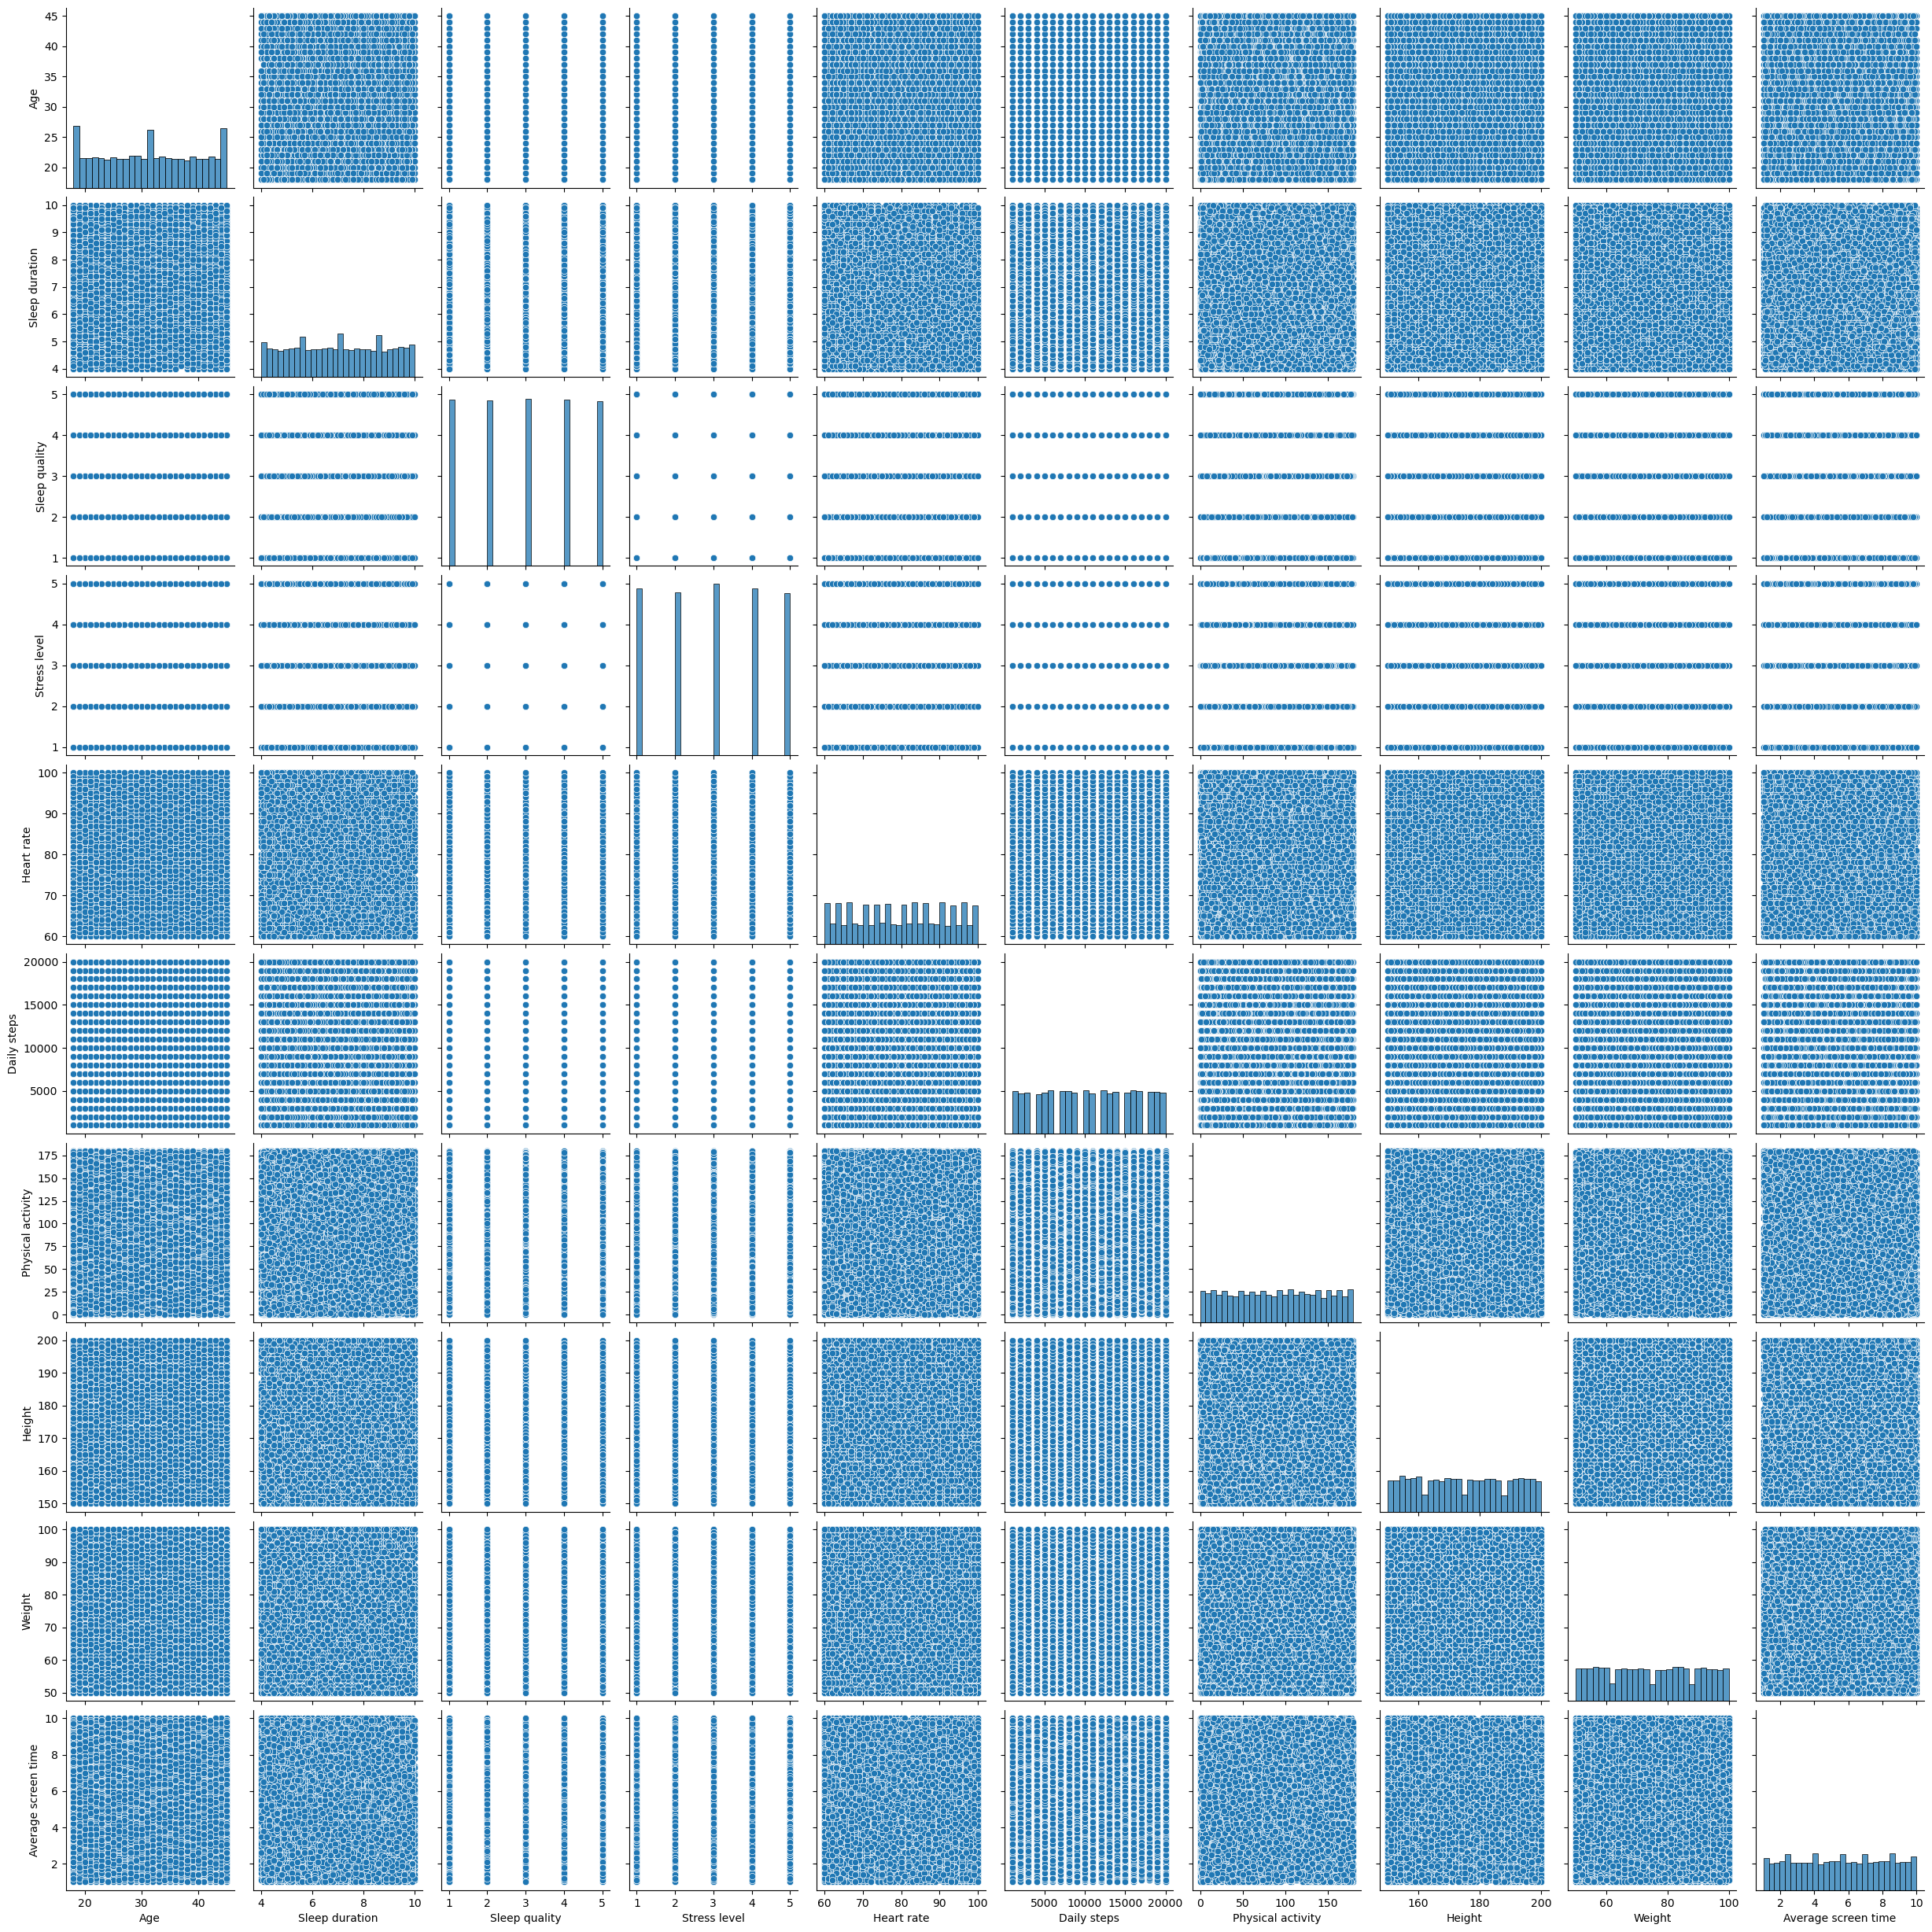

In [16]:
sns.pairplot(df)

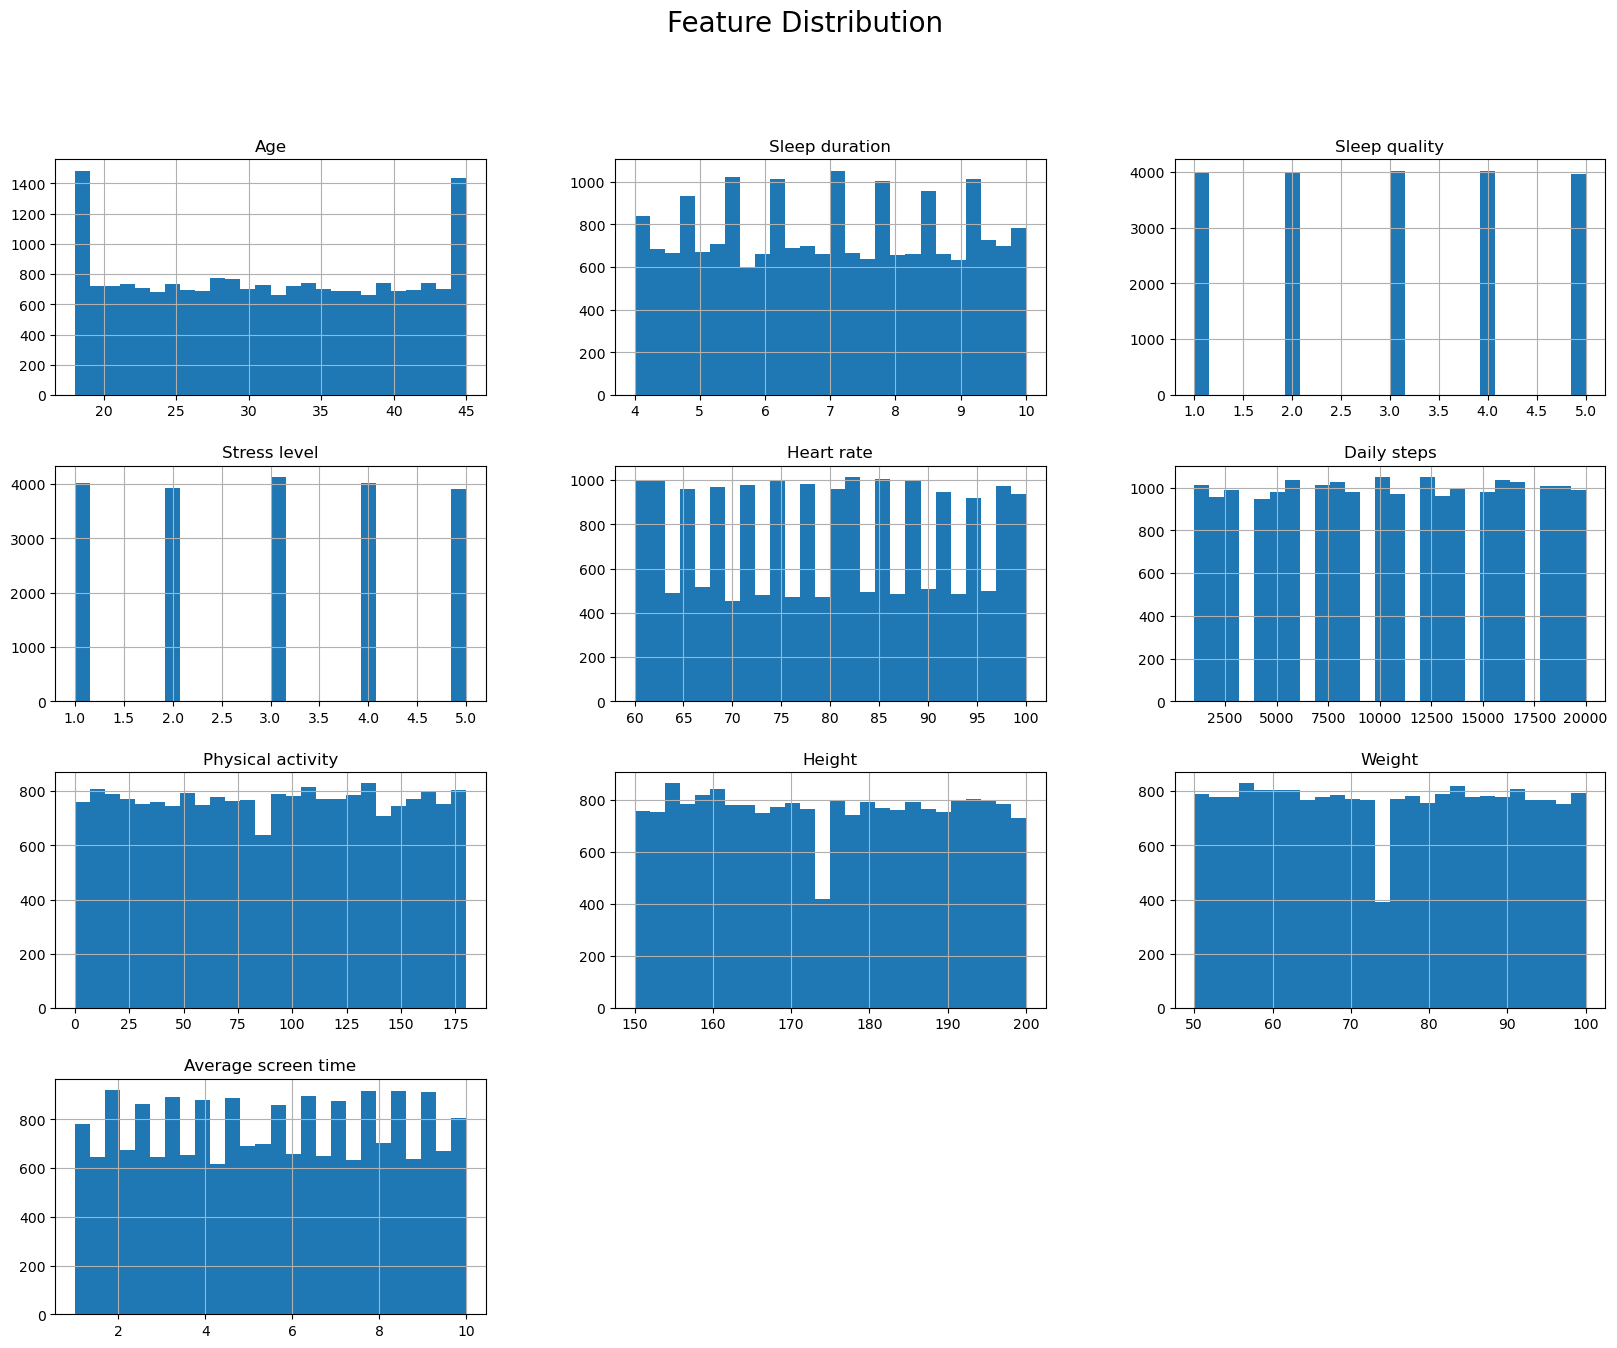

In [17]:
# HISTPLOT
df.hist(figsize=(20, 15), bins=26)
plt.suptitle("Feature Distribution", fontsize=20)
plt.show()

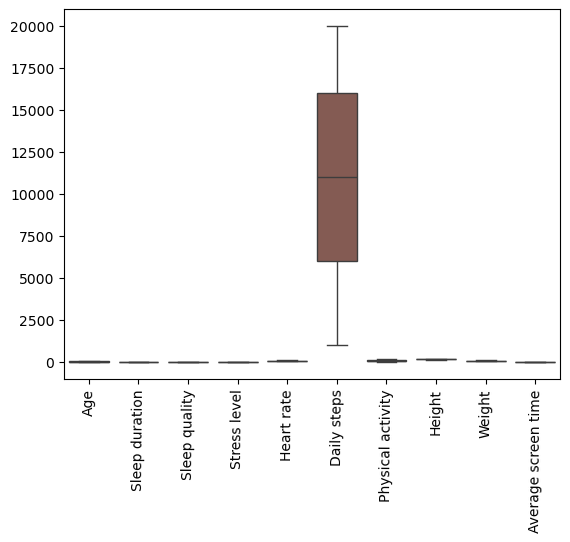

In [18]:
sns.boxplot(df)
plt.xticks(rotation=89.5)
plt.show()

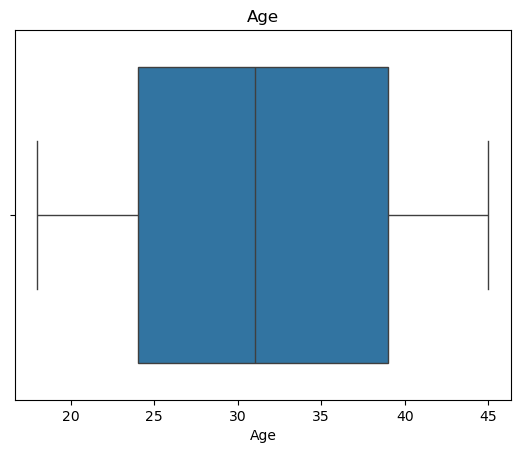

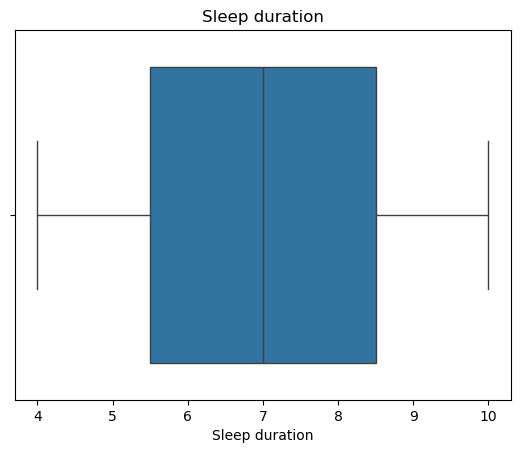

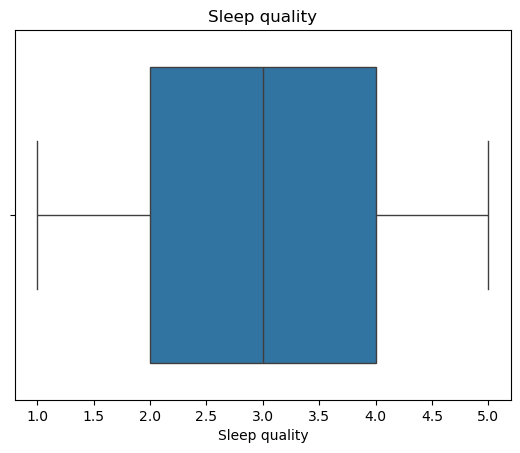

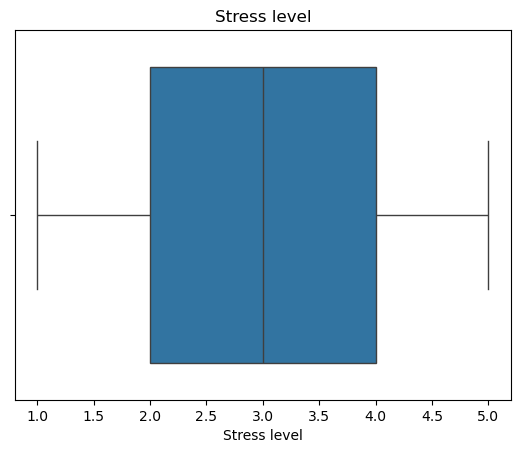

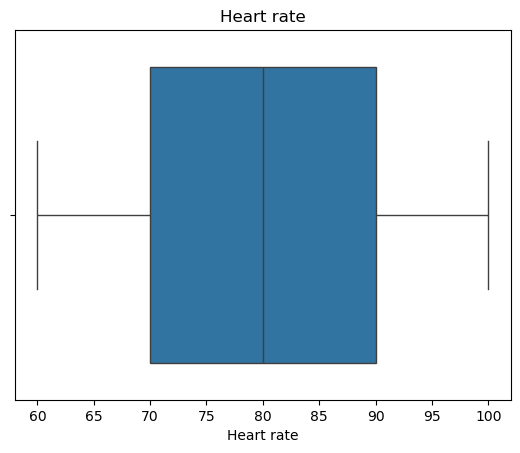

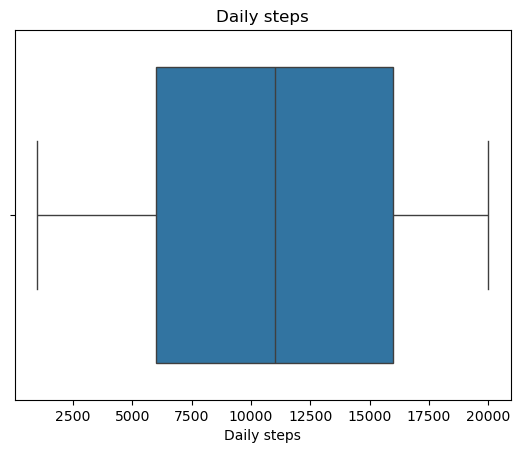

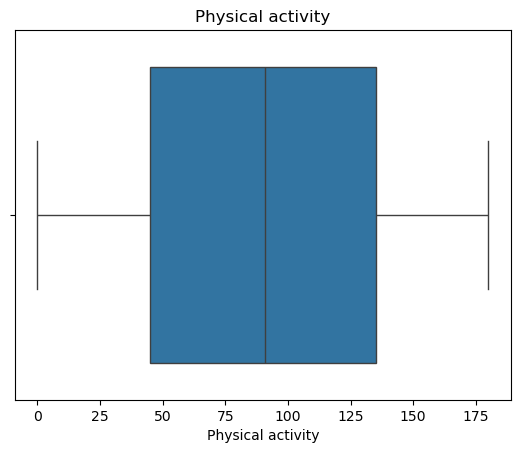

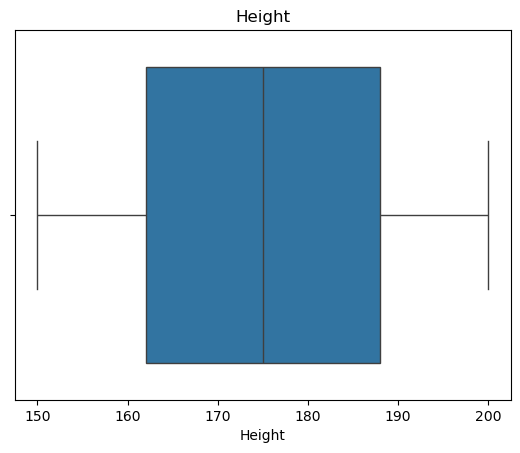

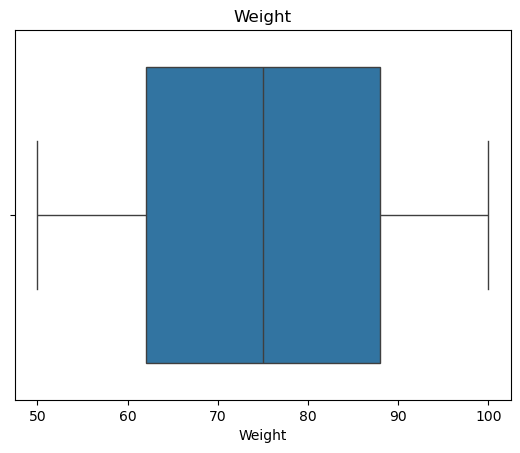

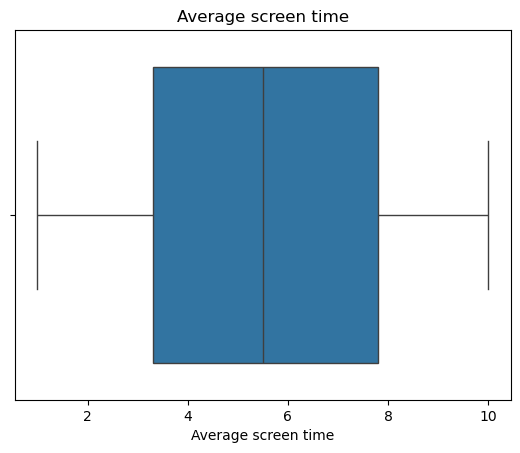

In [19]:
# BOXPLOT
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

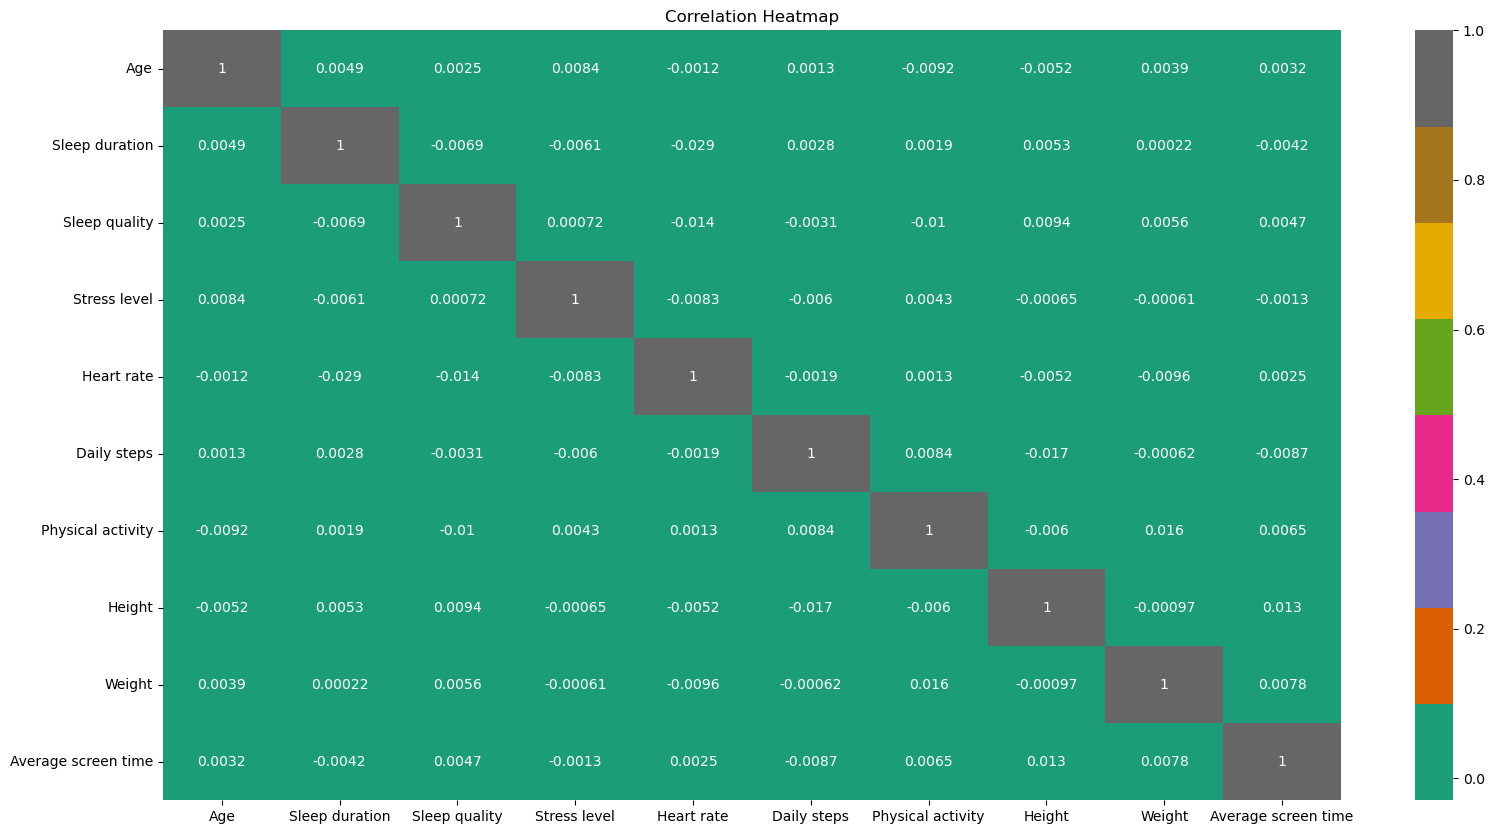

In [20]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Dark2')
plt.title("Correlation Heatmap")
plt.show()

# PREPROCESSING

In [21]:
df

Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0          F   24             9.5              2             1         137/89   
1          M   39             9.6              2             3         108/64   
2          F   45             5.4              1             5         134/81   
3          F   45             5.4              4             5         110/90   
4          F   42             5.7              3             2          99/67   
...      ...  ...             ...            ...           ...            ...   
19995      M   26             9.4              2             3         132/64   
19996      F   39             7.3              3             4         101/75   
19997      F   20             8.0              5             3         124/63   
19998      M   38             4.5              3             3         136/70   
19999      M   37             5.0              5             3          96/90   

       Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0              67         3000                 31     161  ...        N   
1              60        12000                 74     164  ...        N   
2              95        12000                 93     179  ...        N   
3              78        19000                 32     160  ...        N   
4              72         4000                173     179  ...        N   
...           ...          ...                ...     ...  ...      ...   
19995          91        20000                 88     200  ...        Y   
19996          65         2000                 53     195  ...        N   
19997          78        10000                 17     186  ...        Y   
19998          60         3000                115     170  ...        Y   
19999          73        13000                 57     188  ...        N   

      Medical issue Ongoing medication Smart device before bed  \
0                 Y                  Y                       N   
1                 Y                  Y                       N   
2                 N                  N                       Y   
3                 Y                  N                       N   
4                 Y                  N                       N   
...             ...                ...                     ...   
19995             Y                  Y                       Y   
19996             Y                  Y                       N   
19997             Y                  N                       N   
19998             N                  Y                       N   
19999             Y                  Y                       Y   

      Average screen time Blue-light filter Discomfort Eye-strain  \
0                     8.7                 N                     Y   
1                     9.6                 Y                     N   
2                     4.0                 N                     Y   
3                     7.6                 N                     Y   
4                     3.5                 N                     Y   
...                   ...               ...                   ...   
19995                 3.8                 N                     Y   
19996                 3.8                 N                     N   
19997                 8.4                 N                     N   
19998                 2.2                 N                     N   
19999                 4.2                 Y                     N   

      Redness in eye Itchiness/Irritation in eye Dry Eye Disease  
0                  Y                           N               Y  
1                  N                           Y               Y  
2                  N                           N               N  
3                  N                           Y               N  
4                  Y                           N               Y  
...              ...                         ...             ...  
19995              N                     

In [22]:
le0=LabelEncoder()

In [23]:
df['Gender	'] = le0.fit_transform(df['Gender'])

In [24]:
le=LabelEncoder()

In [25]:
df['Sleep disorder'] = le.fit_transform(df['Sleep disorder'])

In [26]:
le1=LabelEncoder()

In [27]:
df['Wake up during night'] = le1.fit_transform(df['Wake up during night'])

In [28]:
le2=LabelEncoder()

In [29]:
df['Feel sleepy during day'] = le2.fit_transform(df['Feel sleepy during day'])

In [30]:
le3=LabelEncoder()

In [31]:
df['Caffeine consumption'] = le3.fit_transform(df['Caffeine consumption'])

In [32]:
le4=LabelEncoder()

In [33]:
df['Alcohol consumption'] = le4.fit_transform(df['Alcohol consumption'])

In [34]:
le5=LabelEncoder()

In [35]:
df['Smoking'] = le5.fit_transform(df['Smoking'])

In [36]:
le6=LabelEncoder()

In [37]:
df['Medical issue'] = le6.fit_transform(df['Medical issue'])

In [38]:
le7=LabelEncoder()

In [39]:
df['Ongoing medication'] = le7.fit_transform(df['Ongoing medication'])

In [40]:
le8=LabelEncoder()

In [41]:
df['Smart device before bed'] = le8.fit_transform(df['Smart device before bed'])

In [42]:
le9=LabelEncoder()

In [43]:
df['Blue-light filter'] = le9.fit_transform(df['Blue-light filter'])

In [44]:
le10=LabelEncoder()

In [45]:
df['Discomfort Eye-strain'] = le10.fit_transform(df['Discomfort Eye-strain'])

In [46]:
le11=LabelEncoder()

In [47]:
df['Redness in eye'] = le11.fit_transform(df['Redness in eye'])

In [48]:
le12=LabelEncoder()

In [49]:
df['Itchiness/Irritation in eye'] = le12.fit_transform(df['Itchiness/Irritation in eye'])

In [50]:
le13=LabelEncoder()

In [51]:
df['Dry Eye Disease'] = le13.fit_transform(df['Dry Eye Disease'])

In [52]:
df

Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0          F   24             9.5              2             1         137/89   
1          M   39             9.6              2             3         108/64   
2          F   45             5.4              1             5         134/81   
3          F   45             5.4              4             5         110/90   
4          F   42             5.7              3             2          99/67   
...      ...  ...             ...            ...           ...            ...   
19995      M   26             9.4              2             3         132/64   
19996      F   39             7.3              3             4         101/75   
19997      F   20             8.0              5             3         124/63   
19998      M   38             4.5              3             3         136/70   
19999      M   37             5.0              5             3          96/90   

       Heart rate  Daily steps  Physical activity  Height  ...  Medical issue  \
0              67         3000                 31     161  ...              1   
1              60        12000                 74     164  ...              1   
2              95        12000                 93     179  ...              0   
3              78        19000                 32     160  ...              1   
4              72         4000                173     179  ...              1   
...           ...          ...                ...     ...  ...            ...   
19995          91        20000                 88     200  ...              1   
19996          65         2000                 53     195  ...              1   
19997          78        10000                 17     186  ...              1   
19998          60         3000                115     170  ...              0   
19999          73        13000                 57     188  ...              1   

       Ongoing medication  Smart device before bed  Average screen time  \
0                       1                        0                  8.7   
1                       1                        0                  9.6   
2                       0                        1                  4.0   
3                       0                        0                  7.6   
4                       0                        0                  3.5   
...                   ...                      ...                  ...   
19995                   1                        1                  3.8   
19996                   1                        0                  3.8   
19997                   0                        0                  8.4   
19998                   1                        0                  2.2   
19999                   1                        1                  4.2   

       Blue-light filter  Discomfort Eye-strain  Redness in eye  \
0                      0                      1               1   
1                      1                      0               0   
2                      0                      1               0   
3                      0                      1               0   
4                      0                      1               1   
...                  ...                    ...             ...   
19995                  0                      1               0   
19996                  0                      0               1   
19997                  0                      0               1   
19998                  0                      0               0   
19999                  1                      0               0   

       Itchiness/Irritation in eye  Dry Eye Disease  Gender\t  
0                                0                1         0  
1                                1                1         1  
2                                0                0         0  
3                                1                0         0  
4                                0

In [53]:
df=df.drop(['Gender','Blood pressure'],axis=1)
df

Age  Sleep duration  Sleep quality  Stress level  Heart rate  \
0       24             9.5              2             1          67   
1       39             9.6              2             3          60   
2       45             5.4              1             5          95   
3       45             5.4              4             5          78   
4       42             5.7              3             2          72   
...    ...             ...            ...           ...         ...   
19995   26             9.4              2             3          91   
19996   39             7.3              3             4          65   
19997   20             8.0              5             3          78   
19998   38             4.5              3             3          60   
19999   37             5.0              5             3          73   

       Daily steps  Physical activity  Height  Weight  Sleep disorder  ...  \
0             3000                 31     161      69               1  ...   
1            12000                 74     164      87               0  ...   
2            12000                 93     179      94               1  ...   
3            19000                 32     160      77               0  ...   
4             4000                173     179      99               0  ...   
...            ...                ...     ...     ...             ...  ...   
19995        20000                 88     200      72               0  ...   
19996         2000                 53     195      96               1  ...   
19997        10000                 17     186      87               0  ...   
19998         3000                115     170      66               0  ...   
19999        13000                 57     188      62               0  ...   

       Medical issue  Ongoing medication  Smart device before bed  \
0                  1                   1                        0   
1                  1                   1                        0   
2                  0                   0                        1   
3                  1                   0                        0   
4                  1                   0                        0   
...              ...                 ...                      ...   
19995              1                   1                        1   
19996              1                   1                        0   
19997              1                   0                        0   
19998              0                   1                        0   
19999              1                   1                        1   

       Average screen time  Blue-light filter  Discomfort Eye-strain  \
0                      8.7                  0                      1   
1                      9.6                  1                      0   
2                      4.0                  0                      1   
3                      7.6                  0                      1   
4                      3.5                  0                      1   
...                    ...                ...                    ...   
19995                  3.8                  0                      1   
19996                  3.8                  0                      0   
19997                  8.4                  0                      0   
19998                  2.2                  0                      0   
19999                  4.2                  1                      0   

       Redness in eye  Itchiness/Irritation in eye  Dry Eye Disease  Gender\t  
0                   1                            0                1         0  
1                   0                            1                1         1  
2                   0                            0                0         0  
3                   0                            1                0         0  
4                   1                            0                1         0  
...               ...                      

In [54]:
df.head()

Age  Sleep duration  Sleep quality  Stress level  Heart rate  Daily steps  \
0   24             9.5              2             1          67         3000   
1   39             9.6              2             3          60        12000   
2   45             5.4              1             5          95        12000   
3   45             5.4              4             5          78        19000   
4   42             5.7              3             2          72         4000   

   Physical activity  Height  Weight  Sleep disorder  ...  Medical issue  \
0                 31     161      69               1  ...              1   
1                 74     164      87               0  ...              1   
2                 93     179      94               1  ...              0   
3                 32     160      77               0  ...              1   
4                173     179      99               0  ...              1   

   Ongoing medication  Smart device before bed  Average screen time  \
0                   1                        0                  8.7   
1                   1                        0                  9.6   
2                   0                        1                  4.0   
3                   0                        0                  7.6   
4                   0                        0                  3.5   

   Blue-light filter  Discomfort Eye-strain  Redness in eye  \
0                  0                      1               1   
1                  1                      0               0   
2                  0                      1               0   
3                  0                      1               0   
4                  0                      1               1   

   Itchiness/Irritation in eye  Dry Eye Disease  Gender\t  
0                            0                1         0  
1                            1                1         1  
2                            0                0         0  
3                            1                0         0  
4                            0                1         0  

[5 rows x 25 columns]

In [55]:
x=df.drop('Dry Eye Disease',axis=1)
y=df[['Dry Eye Disease']]

In [56]:
x

Age  Sleep duration  Sleep quality  Stress level  Heart rate  \
0       24             9.5              2             1          67   
1       39             9.6              2             3          60   
2       45             5.4              1             5          95   
3       45             5.4              4             5          78   
4       42             5.7              3             2          72   
...    ...             ...            ...           ...         ...   
19995   26             9.4              2             3          91   
19996   39             7.3              3             4          65   
19997   20             8.0              5             3          78   
19998   38             4.5              3             3          60   
19999   37             5.0              5             3          73   

       Daily steps  Physical activity  Height  Weight  Sleep disorder  ...  \
0             3000                 31     161      69               1  ...   
1            12000                 74     164      87               0  ...   
2            12000                 93     179      94               1  ...   
3            19000                 32     160      77               0  ...   
4             4000                173     179      99               0  ...   
...            ...                ...     ...     ...             ...  ...   
19995        20000                 88     200      72               0  ...   
19996         2000                 53     195      96               1  ...   
19997        10000                 17     186      87               0  ...   
19998         3000                115     170      66               0  ...   
19999        13000                 57     188      62               0  ...   

       Smoking  Medical issue  Ongoing medication  Smart device before bed  \
0            0              1                   1                        0   
1            0              1                   1                        0   
2            0              0                   0                        1   
3            0              1                   0                        0   
4            0              1                   0                        0   
...        ...            ...                 ...                      ...   
19995        1              1                   1                        1   
19996        0              1                   1                        0   
19997        1              1                   0                        0   
19998        1              0                   1                        0   
19999        0              1                   1                        1   

       Average screen time  Blue-light filter  Discomfort Eye-strain  \
0                      8.7                  0                      1   
1                      9.6                  1                      0   
2                      4.0                  0                      1   
3                      7.6                  0                      1   
4                      3.5                  0                      1   
...                    ...                ...                    ...   
19995                  3.8                  0                      1   
19996                  3.8                  0                      0   
19997                  8.4                  0                      0   
19998                  2.2                  0                      0   
19999                  4.2                  1                      0   

       Redness in eye  Itchiness/Irritation in eye  Gender\t  
0                   1                            0         0  
1                   0                            1         1  
2                   0                            0         0  
3                   0                            1         0  
4                   1                            0         0  
...               ...                

In [57]:
y

Dry Eye Disease
0                    1
1                    1
2                    0
3                    0
4                    1
...                ...
19995                1
19996                1
19997                0
19998                1
19999                0

[20000 rows x 1 columns]

#### SCALING

In [58]:
sc=StandardScaler()
x=sc.fit_transform(x)

## TRAIN TEST SPLIT

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=60)

## LOGISTIC REGRESSION

Test score: 0.6832
train score: 0.685
CR:               precision    recall  f1-score   support

           0       0.66      0.16      0.26      1714
           1       0.69      0.96      0.80      3286

    accuracy                           0.68      5000
   macro avg       0.67      0.56      0.53      5000
weighted avg       0.68      0.68      0.61      5000

Test accuracy: 68.32000000000001
Train accuracy: 68.5


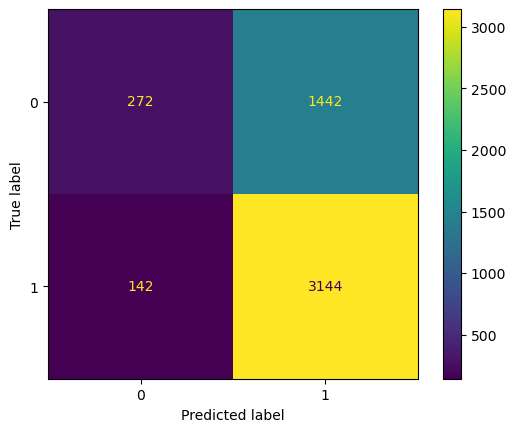

In [60]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt=accuracy_score(y_test,y_testpred)*100
lrr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt)
print('Train accuracy:',lrr)

### DECISION TREE

Test accuracy: 0.5786
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.39      0.40      0.39      1714
           1       0.68      0.67      0.68      3286

    accuracy                           0.58      5000
   macro avg       0.53      0.53      0.53      5000
weighted avg       0.58      0.58      0.58      5000

Test accuracy: 57.86
Train accuracy: 100.0


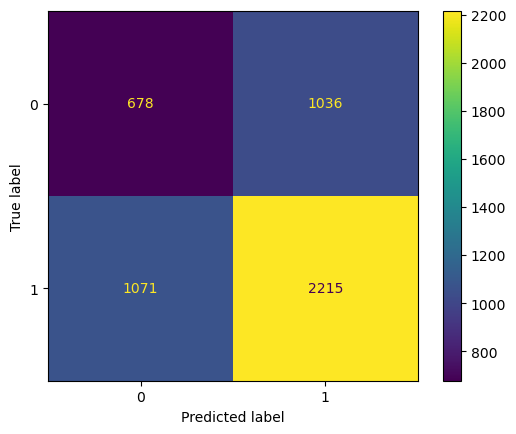

In [61]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt=accuracy_score(y_test,y_testpred)*100
dtr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt)
print('Train accuracy:',dtr)

### RANDOM FOREST CLASSIFIER

Test accuracy: 0.6164
train accuracy: 0.9582
CR:               precision    recall  f1-score   support

           0       0.42      0.32      0.36      1714
           1       0.68      0.77      0.73      3286

    accuracy                           0.62      5000
   macro avg       0.55      0.55      0.54      5000
weighted avg       0.59      0.62      0.60      5000

Test accuracy: 61.63999999999999
Train accuracy: 95.82000000000001


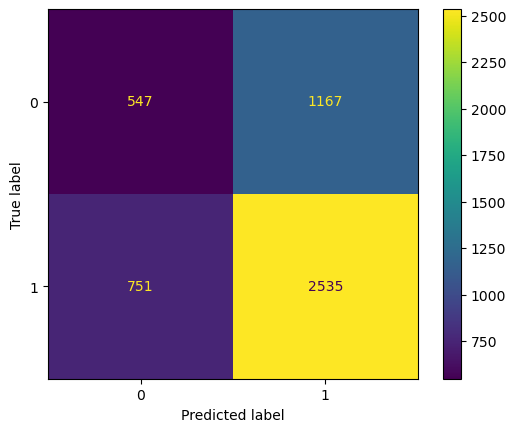

In [62]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft=accuracy_score(y_test,y_testpred)*100
rfr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft)
print('Train accuracy:',rfr)

### X-G BOOST

Test accuracy: 0.6588
train accuracy: 0.8994
CR:               precision    recall  f1-score   support

           0       0.50      0.30      0.37      1714
           1       0.70      0.85      0.77      3286

    accuracy                           0.66      5000
   macro avg       0.60      0.57      0.57      5000
weighted avg       0.63      0.66      0.63      5000

Test accuracy: 65.88000000000001
Train accuracy: 89.94


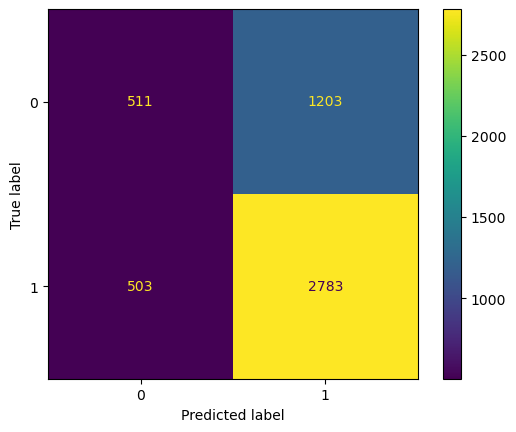

In [63]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgt=accuracy_score(y_test,y_testpred)*100
xgr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgt)
print('Train accuracy:',xgr)

### SVM

Test score: 0.6988
train score: 0.6982
CR:               precision    recall  f1-score   support

           0       0.67      0.24      0.35      1714
           1       0.70      0.94      0.80      3286

    accuracy                           0.70      5000
   macro avg       0.69      0.59      0.58      5000
weighted avg       0.69      0.70      0.65      5000

Test accuracy: 69.88
Train accuracy: 69.82000000000001


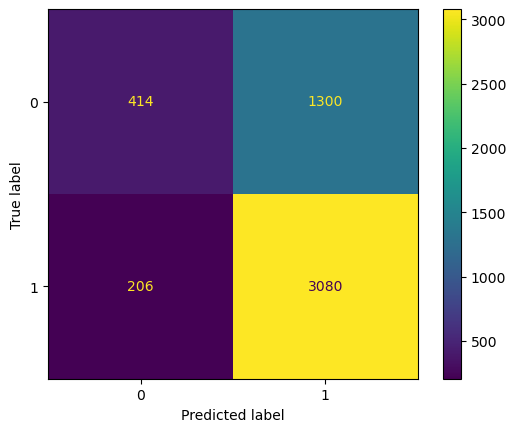

In [64]:
sv=SVC()
sv.fit(x_train,y_train)
y_testpred=sv.predict(x_test)
y_trainpred=sv.predict(x_train)
print('Test score:',sv.score(x_test,y_test))
print('train score:',sv.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt=accuracy_score(y_test,y_testpred)*100
svr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt)
print('Train accuracy:',svr)

# KNN

Test accuracy: 0.5964
train accuracy: 0.7892
CR:               precision    recall  f1-score   support

           0       0.39      0.32      0.36      1714
           1       0.68      0.74      0.71      3286

    accuracy                           0.60      5000
   macro avg       0.53      0.53      0.53      5000
weighted avg       0.58      0.60      0.59      5000

Test accuracy: 59.64
Train accuracy: 78.92


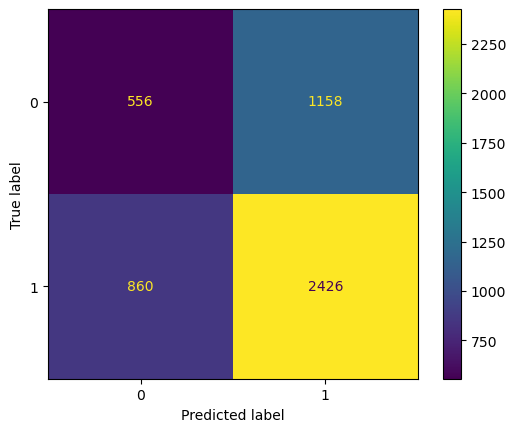

In [65]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt=accuracy_score(y_test,y_testpred)*100
knnr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt)
print('Train accuracy:',knnr)
import warnings
warnings.simplefilter('ignore')

## NAIVE BAYES

Test accuracy: 0.6856
train accuracy: 0.6838
CR:               precision    recall  f1-score   support

           0       0.68      0.16      0.26      1714
           1       0.69      0.96      0.80      3286

    accuracy                           0.69      5000
   macro avg       0.68      0.56      0.53      5000
weighted avg       0.68      0.69      0.61      5000

Test accuracy: 68.56
Train accuracy: 68.38


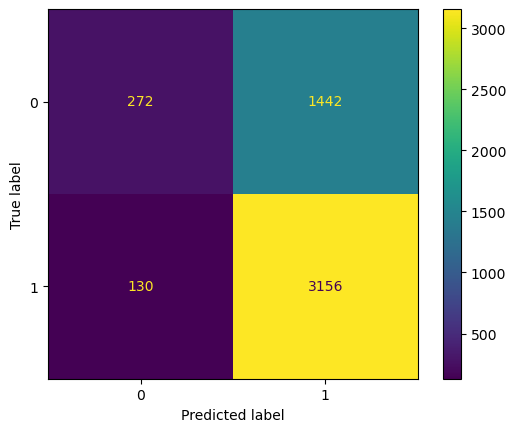

In [66]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_testpred=gb.predict(x_test)
y_trainpred=gb.predict(x_train)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

### ADABOOST

Test accuracy: 0.6572
train accuracy: 0.6500666666666667
CR:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1714
           1       0.66      1.00      0.79      3286

    accuracy                           0.66      5000
   macro avg       0.33      0.50      0.40      5000
weighted avg       0.43      0.66      0.52      5000

Test accuracy: 65.72
Train accuracy: 65.00666666666667


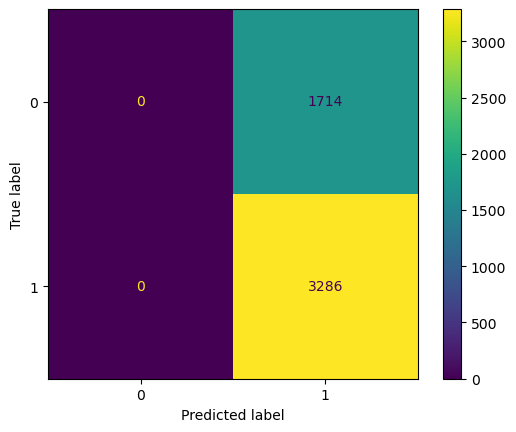

In [67]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt=accuracy_score(y_test,y_testpred)*100
adr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt)
print('Train accuracy:',adr)

### GRADIENT BOOSTING

Test accuracy: 0.699
train accuracy: 0.6978
CR:               precision    recall  f1-score   support

           0       0.67      0.24      0.36      1714
           1       0.70      0.94      0.80      3286

    accuracy                           0.70      5000
   macro avg       0.69      0.59      0.58      5000
weighted avg       0.69      0.70      0.65      5000

Test accuracy: 69.89999999999999
Train accuracy: 69.78


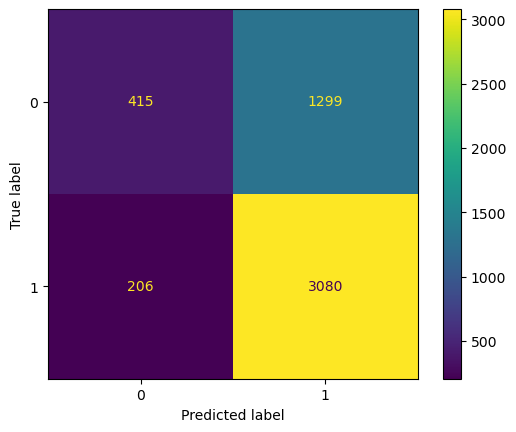

In [68]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

# INITIAL PERFORMANCE

In [69]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt','xgb','sv'])
tb['test_accuracy']=pd.Series([knnt,lrt,gbt,rft,adt,gbt,dtt,xgt,svt])
tb['train_accuracy']=pd.Series([knnr,lrr,gbr,rfr,adr,gbr,dtr,xgr,svr])
tb

model  test_accuracy  train_accuracy
0       knn          59.64       78.920000
1        lr          68.32       68.500000
2        gb          69.90       69.780000
3        rf          61.64       95.820000
4  adaboost          65.72       65.006667
5       gbc          69.90       69.780000
6        dt          57.86      100.000000
7       xgb          65.88       89.940000
8        sv          69.88       69.820000

# BALANCING OF DATA

In [70]:
from imblearn.over_sampling import SMOTE
#from collections import Counter
# Apply SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)
y_resampled.value_counts()


Dry Eye Disease
0                  13037
1                  13037
Name: count, dtype: int64

# COUNT PLOT AFTER SMOTE

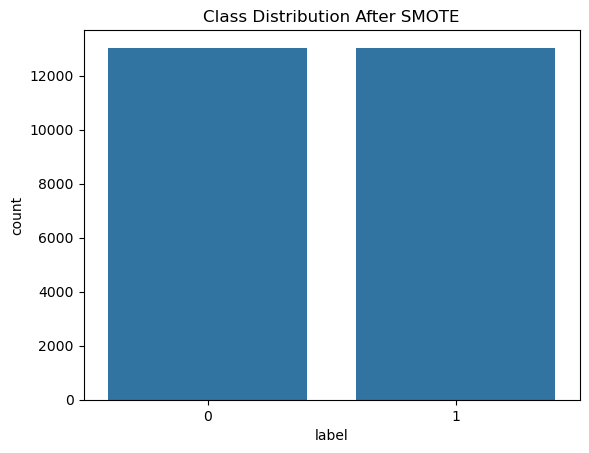

In [71]:
df_resampled = pd.DataFrame({'label': y_resampled.values.ravel()})
sns.countplot(data=df_resampled, x='label')
plt.title("Class Distribution After SMOTE")
plt.show()


# TRAIN TEST SPLIT AFTER SMOTE

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=60)

### LOGISTIC REGRESSION

Test score: 0.5660377358490566
train score: 0.5577090258245972
CR:               precision    recall  f1-score   support

           0       0.56      0.59      0.57      3245
           1       0.57      0.55      0.56      3274

    accuracy                           0.57      6519
   macro avg       0.57      0.57      0.57      6519
weighted avg       0.57      0.57      0.57      6519

Test accuracy: 56.60377358490566
Train accuracy: 55.770902582459726


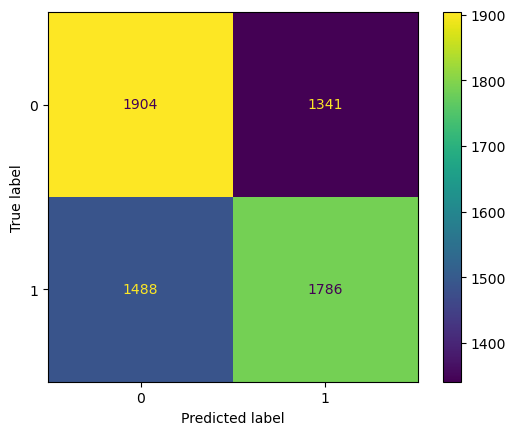

In [73]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt=accuracy_score(y_test,y_testpred)*100
lrr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt)
print('Train accuracy:',lrr)

### DECISION TREE

Test accuracy: 0.664979291302347
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.66      0.69      0.67      3245
           1       0.67      0.64      0.66      3274

    accuracy                           0.66      6519
   macro avg       0.67      0.67      0.66      6519
weighted avg       0.67      0.66      0.66      6519

Test accuracy: 66.4979291302347
Train accuracy: 100.0


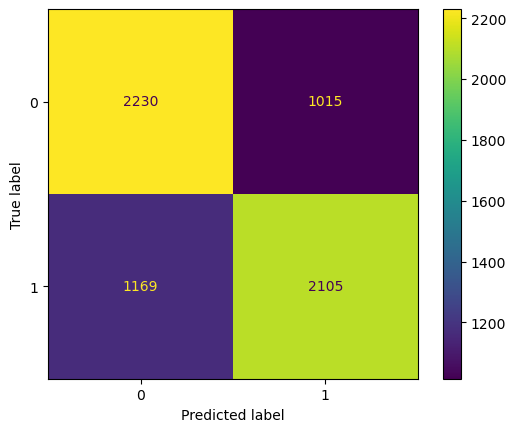

In [74]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt=accuracy_score(y_test,y_testpred)*100
dtr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt)
print('Train accuracy:',dtr)

### RANDOM FOREST CLASSIFIER

Test accuracy: 0.6815462494247584
train accuracy: 0.9671695218614165
CR:               precision    recall  f1-score   support

           0       0.69      0.66      0.67      3245
           1       0.68      0.70      0.69      3274

    accuracy                           0.68      6519
   macro avg       0.68      0.68      0.68      6519
weighted avg       0.68      0.68      0.68      6519

Test accuracy: 68.15462494247583
Train accuracy: 96.71695218614164


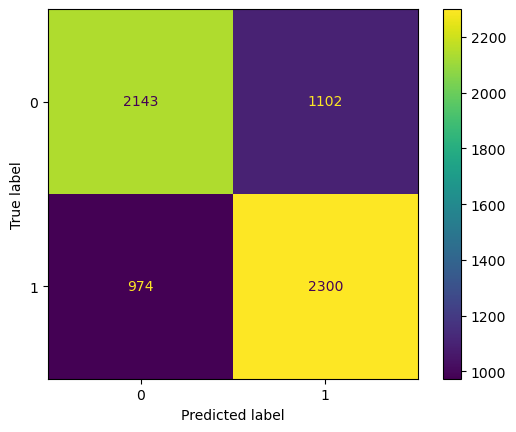

In [75]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft=accuracy_score(y_test,y_testpred)*100
rfr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft)
print('Train accuracy:',rfr)

### XG BOOST

Test accuracy: 0.7461267065500844
train accuracy: 0.9022244950140629
CR:               precision    recall  f1-score   support

           0       0.82      0.63      0.71      3245
           1       0.70      0.86      0.77      3274

    accuracy                           0.75      6519
   macro avg       0.76      0.75      0.74      6519
weighted avg       0.76      0.75      0.74      6519

Test accuracy: 74.61267065500844
Train accuracy: 90.22244950140629


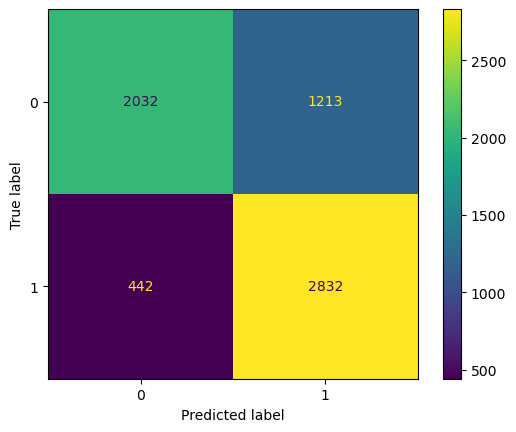

In [76]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgt=accuracy_score(y_test,y_testpred)*100
xgr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgt)
print('Train accuracy:',xgr)

# SVM

Test score: 0.7126859947844761
train score: 0.7963692150345181
CR:               precision    recall  f1-score   support

           0       0.76      0.62      0.68      3245
           1       0.68      0.80      0.74      3274

    accuracy                           0.71      6519
   macro avg       0.72      0.71      0.71      6519
weighted avg       0.72      0.71      0.71      6519

Test accuracy: 71.26859947844761
Train accuracy: 79.6369215034518


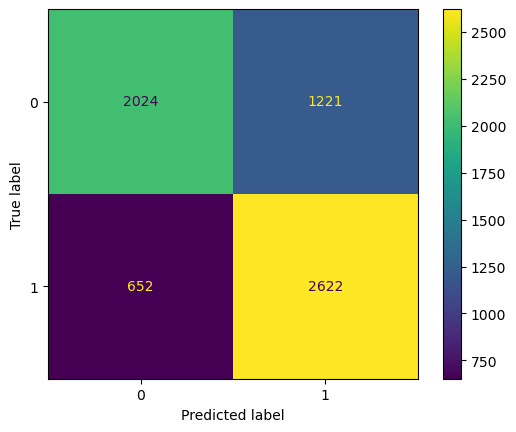

In [77]:
sv=SVC()
sv.fit(x_train,y_train)
y_testpred=sv.predict(x_test)
y_trainpred=sv.predict(x_train)
print('Test score:',sv.score(x_test,y_test))
print('train score:',sv.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt=accuracy_score(y_test,y_testpred)*100
svr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt)
print('Train accuracy:',svr)

# KNN

Test accuracy: 0.6632919159380273
train accuracy: 0.8299156226029148
CR:               precision    recall  f1-score   support

           0       0.62      0.84      0.71      3245
           1       0.75      0.49      0.59      3274

    accuracy                           0.66      6519
   macro avg       0.69      0.66      0.65      6519
weighted avg       0.69      0.66      0.65      6519

Test accuracy: 66.32919159380273
Train accuracy: 82.99156226029149


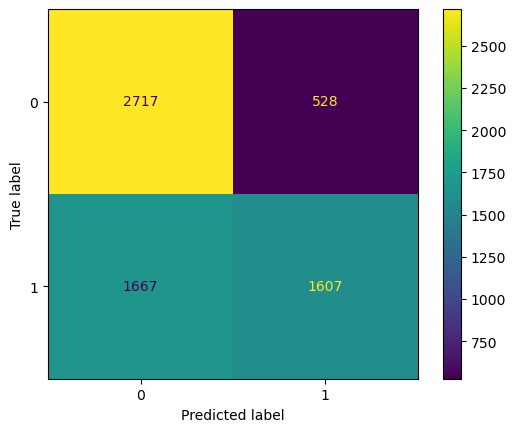

In [78]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt=accuracy_score(y_test,y_testpred)*100
knnr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt)
print('Train accuracy:',knnr)

# NAIVE BAYES

Test accuracy: 0.5948765148028838
train accuracy: 0.586295065200716
CR:               precision    recall  f1-score   support

           0       0.59      0.60      0.59      3245
           1       0.60      0.59      0.60      3274

    accuracy                           0.59      6519
   macro avg       0.59      0.59      0.59      6519
weighted avg       0.59      0.59      0.59      6519

Test accuracy: 59.487651480288385
Train accuracy: 58.629506520071594


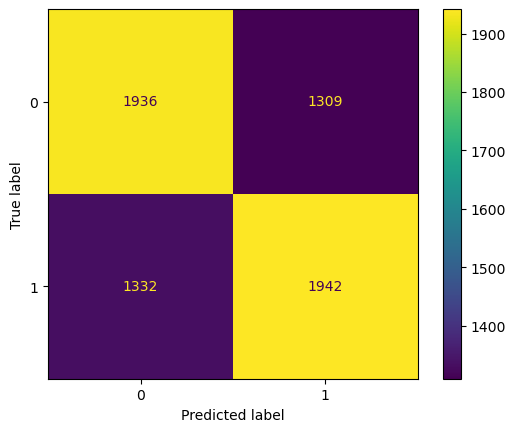

In [79]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_testpred=gb.predict(x_test)
y_trainpred=gb.predict(x_train)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

# ADABOOST

Test accuracy: 0.5850590581377512
train accuracy: 0.5766300178982358
CR:               precision    recall  f1-score   support

           0       0.58      0.63      0.60      3245
           1       0.60      0.54      0.57      3274

    accuracy                           0.59      6519
   macro avg       0.59      0.59      0.58      6519
weighted avg       0.59      0.59      0.58      6519

Test accuracy: 58.505905813775115
Train accuracy: 57.663001789823575


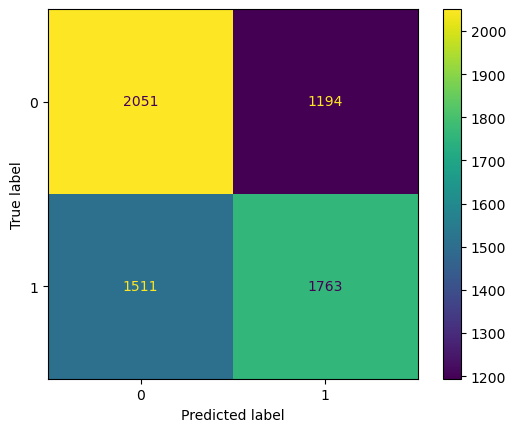

In [80]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt=accuracy_score(y_test,y_testpred)*100
adr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt)
print('Train accuracy:',adr)

# GRADIENT BOOSTING

Test accuracy: 0.750882037122258
train accuracy: 0.7462541549475837
CR:               precision    recall  f1-score   support

           0       0.90      0.56      0.69      3245
           1       0.68      0.94      0.79      3274

    accuracy                           0.75      6519
   macro avg       0.79      0.75      0.74      6519
weighted avg       0.79      0.75      0.74      6519

Test accuracy: 75.0882037122258
Train accuracy: 74.62541549475837


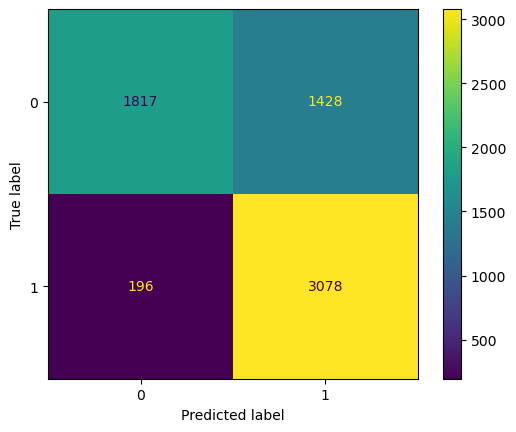

In [81]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbt=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbt)
print('Train accuracy:',gbr)

# PERFORMANCE AFTER SMOTE

In [82]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt','xgb','sv'])
tb['test_accuracy']=pd.Series([knnt,lrt,gbt,rft,adt,gbt,dtt,xgt,svt])
tb['train_accuracy']=pd.Series([knnr,lrr,gbr,rfr,adr,gbr,dtr,xgr,svr])
tb

model  test_accuracy  train_accuracy
0       knn      66.329192       82.991562
1        lr      56.603774       55.770903
2        gb      75.088204       74.625415
3        rf      68.154625       96.716952
4  adaboost      58.505906       57.663002
5       gbc      75.088204       74.625415
6        dt      66.497929      100.000000
7       xgb      74.612671       90.222450
8        sv      71.268599       79.636922

# HYPERPARAMETER TUNNING

In [84]:
# RANDOM FOREST
# ------------------
rf_params={'n_estimators':[5,50,100],'max_depth':[2,4,6,None]}
rf_grid=GridSearchCV(RandomForestClassifier(random_state=42),rf_params,cv=5)
rf_grid.fit(x_train,y_train)
           

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, None],
                         'n_estimators': [5, 50, 100]})

In [85]:
# SVM
# -------
svm_params={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto']}
svm_grid=GridSearchCV(SVC(),svm_params,cv=5)
svm_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [86]:
# DECISION TREE
# ------------------
dt_params={'max_depth':[2,4,6,None],'criterion':['gini','entropy']}
dt_grid=GridSearchCV(DecisionTreeClassifier(random_state=42),dt_params,cv=5)
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, None]})

In [87]:
# LOGITIC REGRESSION
# ----------------------
ir_params={'C':[0.1,1,10]}
ir_grid=GridSearchCV(LogisticRegression(),ir_params,cv=5)
ir_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [88]:
# KNN
knn_param = {
    'n_neighbors':range(3, 31),  # Number of neighbors
    'weights':['uniform','distance'],  # Voting strategy
    'metric':['euclidean','manhattan','minkowski']  # Distance metric
}
knn_grid= GridSearchCV(knn,knn_param,cv=5,scoring='accuracy', n_jobs=-1)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(3, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [89]:
# GaussianNB()
gnb_param = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]  }
gnb_grid = GridSearchCV(gb, gnb_param, cv=5, scoring='accuracy', n_jobs=-1)
gnb_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]},
             scoring='accuracy')

In [90]:
#xgb
xgb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
xgb_grid = GridSearchCV(xgb,xgb_param , cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [91]:
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=42), ada_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
ada_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [92]:
gb = GradientBoostingClassifier()
gb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
gb_grid = GridSearchCV(
    estimator=gb,
    param_grid=gb_param,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
gb_grid.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [93]:
models = {'Random Forest':rf_grid,'SVM': svm_grid,'Logistic Regression': ir_grid,'Decision Tree': dt_grid,'KNN':knn_grid,'GB':gb_grid,'XG Boost':xgb_grid,'GaussianNB':gnb_grid,'Adaboost':ada_grid}
for name, grid in models.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Best Params: {grid.best_params_}")
    print(f"  Accuracy: {acc:.4f}\n")

Random Forest:
  Best Params: {'max_depth': None, 'n_estimators': 100}
  Accuracy: 0.7779

SVM:
  Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
  Accuracy: 0.7279

Logistic Regression:
  Best Params: {'C': 0.1}
  Accuracy: 0.5660

Decision Tree:
  Best Params: {'criterion': 'gini', 'max_depth': 6}
  Accuracy: 0.6733

KNN:
  Best Params: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
  Accuracy: 0.7368

GB:
  Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy: 0.7697

XG Boost:
  Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy: 0.7685

GaussianNB:
  Best Params: {'var_smoothing': 1e-09}
  Accuracy: 0.5949

Adaboost:
  Best Params: {'learning_rate': 1, 'n_estimators': 200}
  Accuracy: 0.7388



In [94]:
# Access the best model
best_rf_model = rf_grid.best_estimator_
y_pred = best_rf_model.predict(x_test)

In [95]:
print(best_rf_model)

RandomForestClassifier(random_state=42)


# MODEL FITTING AFTER HYPERPARAMETER TUNNING

# LOGISTIC REGRESSION

Test score: 0.5660377358490566
train score: 0.5577090258245972
CR:               precision    recall  f1-score   support

           0       0.56      0.59      0.57      3245
           1       0.57      0.55      0.56      3274

    accuracy                           0.57      6519
   macro avg       0.57      0.57      0.57      6519
weighted avg       0.57      0.57      0.57      6519

Test accuracy: 56.60377358490566
Train accuracy: 55.770902582459726


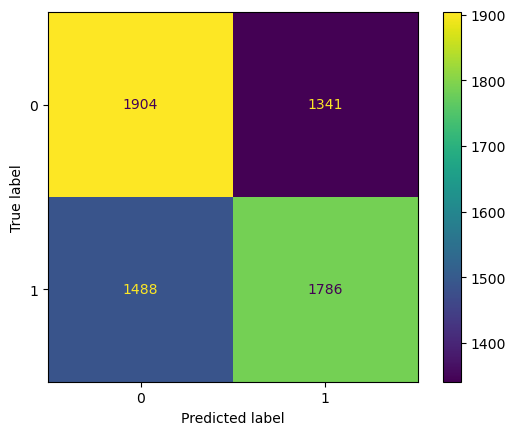

In [96]:
lr=LogisticRegression(C=0.1)
lr.fit(x_train,y_train)
y_testpred=lr.predict(x_test)
y_trainpred=lr.predict(x_train)
print('Test score:',lr.score(x_test,y_test))
print('train score:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrth=accuracy_score(y_test,y_testpred)*100
lrrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrth)
print('Train accuracy:',lrrh)

# DECISION TREE

Test accuracy: 0.6732627703635526
train accuracy: 0.6703656353873689
CR:               precision    recall  f1-score   support

           0       0.87      0.40      0.55      3245
           1       0.61      0.94      0.74      3274

    accuracy                           0.67      6519
   macro avg       0.74      0.67      0.65      6519
weighted avg       0.74      0.67      0.65      6519

Test accuracy: 67.32627703635526
Train accuracy: 67.0365635387369


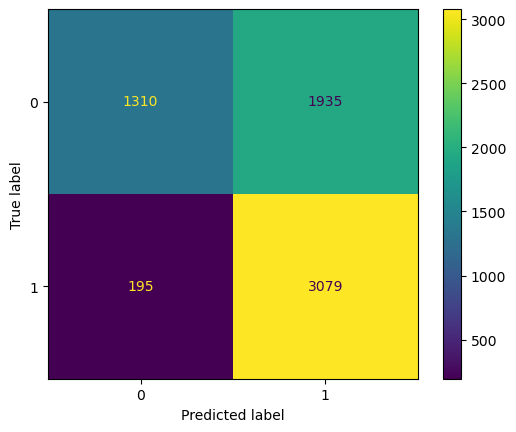

In [97]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=6)
dt.fit(x_train,y_train)
y_testpred=dt.predict(x_test)
y_trainpred=dt.predict(x_train)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtth=accuracy_score(y_test,y_testpred)*100
dtrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtth)
print('Train accuracy:',dtrh)

# RANDOM FOREST

Test accuracy: 0.7812547936800123
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.88      0.65      0.75      3245
           1       0.72      0.91      0.81      3274

    accuracy                           0.78      6519
   macro avg       0.80      0.78      0.78      6519
weighted avg       0.80      0.78      0.78      6519

Test accuracy: 78.12547936800122
Train accuracy: 100.0


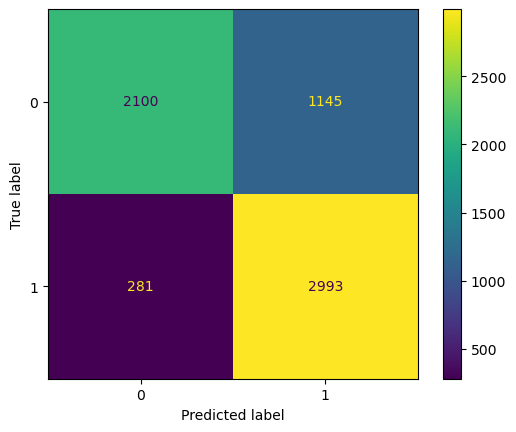

In [98]:
rf=RandomForestClassifier(max_depth=None,n_estimators=100)
rf.fit(x_train,y_train)
y_testpred=rf.predict(x_test)
y_trainpred=rf.predict(x_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rfth=accuracy_score(y_test,y_testpred)*100
rfrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rfth)
print('Train accuracy:',rfrh)

# SVM

Test score: 0.7278723730633533
train score: 0.9578113014574278
CR:               precision    recall  f1-score   support

           0       0.73      0.72      0.73      3245
           1       0.73      0.73      0.73      3274

    accuracy                           0.73      6519
   macro avg       0.73      0.73      0.73      6519
weighted avg       0.73      0.73      0.73      6519

Test accuracy: 72.78723730633533
Train accuracy: 95.78113014574278


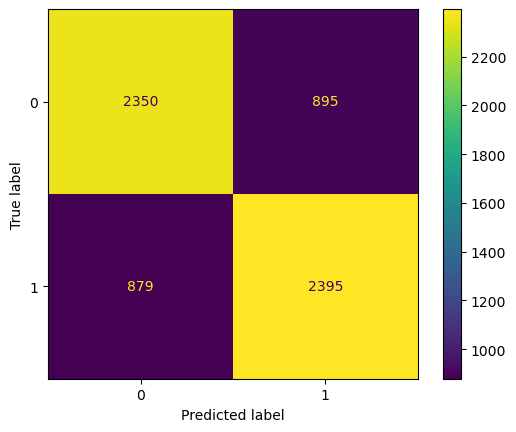

In [99]:
sv=SVC(C= 10, gamma='auto',kernel='rbf')
sv.fit(x_train,y_train)
y_testpred=sv.predict(x_test)
y_trainpred=sv.predict(x_train)
print('Test score:',sv.score(x_test,y_test))
print('train score:',sv.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svth=accuracy_score(y_test,y_testpred)*100
svrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svth)
print('Train accuracy:',svrh)

# KNN

Test accuracy: 0.7367694431661298
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.69      0.85      0.76      3245
           1       0.81      0.63      0.70      3274

    accuracy                           0.74      6519
   macro avg       0.75      0.74      0.73      6519
weighted avg       0.75      0.74      0.73      6519

Test accuracy: 73.67694431661297
Train accuracy: 100.0


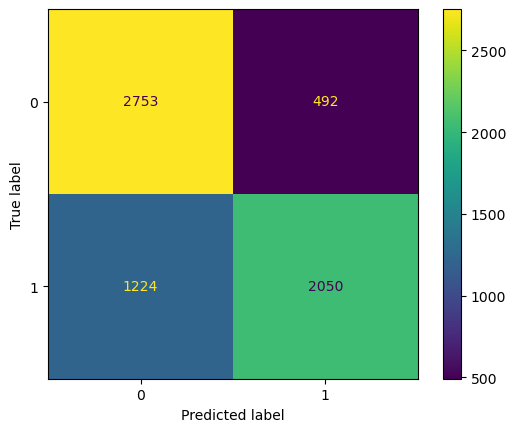

In [100]:
knn=KNeighborsClassifier(metric='manhattan',n_neighbors= 4,weights='distance')
knn.fit(x_train,y_train)
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnth=accuracy_score(y_test,y_testpred)*100
knnrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnth)
print('Train accuracy:',knnrh)

# XG BOOST

Test accuracy: 0.7685227795674183
train accuracy: 0.7673229353106622
CR:               precision    recall  f1-score   support

           0       0.91      0.60      0.72      3245
           1       0.70      0.94      0.80      3274

    accuracy                           0.77      6519
   macro avg       0.80      0.77      0.76      6519
weighted avg       0.80      0.77      0.76      6519

Test accuracy: 76.85227795674183
Train accuracy: 76.73229353106622


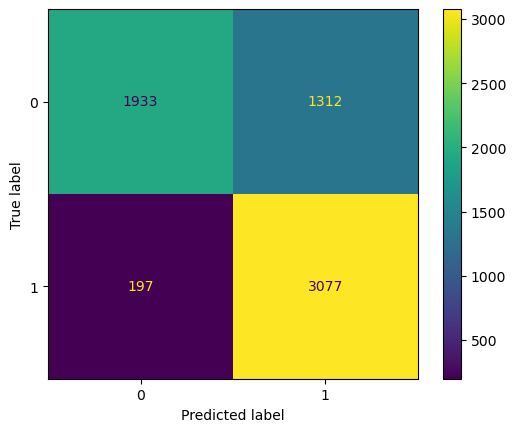

In [101]:
xgb = XGBClassifier(learning_rate= 0.1,max_depth= 3, min_samples_split=2, n_estimators=200)
xgb.fit(x_train, y_train)
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test accuracy:',xgb.score(x_test,y_test))
print('train accuracy:',xgb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgth=accuracy_score(y_test,y_testpred)*100
xgrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgth)
print('Train accuracy:',xgrh)

# NAIVE BAYES

Test accuracy: 0.5948765148028838
train accuracy: 0.586295065200716
CR:               precision    recall  f1-score   support

           0       0.59      0.60      0.59      3245
           1       0.60      0.59      0.60      3274

    accuracy                           0.59      6519
   macro avg       0.59      0.59      0.59      6519
weighted avg       0.59      0.59      0.59      6519

Test accuracy: 59.487651480288385
Train accuracy: 58.629506520071594


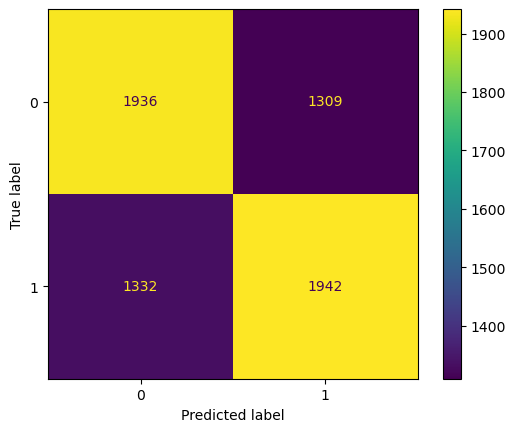

In [102]:
gb=GaussianNB(var_smoothing=1e-09)
gb.fit(x_train,y_train)
y_testpred=gb.predict(x_test)
y_trainpred=gb.predict(x_train)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbth=accuracy_score(y_test,y_testpred)*100
gbrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbth)
print('Train accuracy:',gbrh)

# ADA BOOST

Test accuracy: 0.7387636140512348
train accuracy: 0.7408335464075684
CR:               precision    recall  f1-score   support

           0       0.81      0.62      0.70      3245
           1       0.70      0.85      0.77      3274

    accuracy                           0.74      6519
   macro avg       0.75      0.74      0.73      6519
weighted avg       0.75      0.74      0.74      6519

Test accuracy: 73.87636140512348
Train accuracy: 74.08335464075684


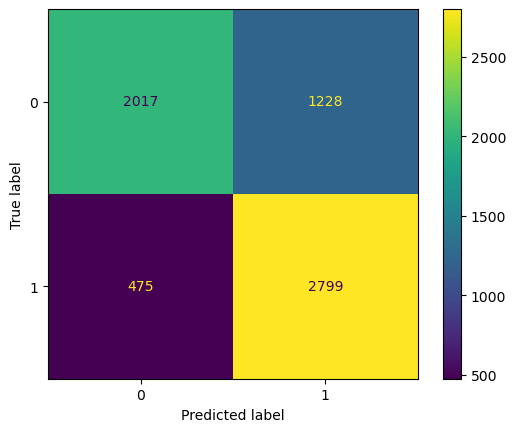

In [103]:
adaboost=AdaBoostClassifier(learning_rate= 1,n_estimators= 200)
adaboost.fit(x_train,y_train)
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adth=accuracy_score(y_test,y_testpred)*100
adrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adth)
print('Train accuracy:',adrh)

# GRADIENT BOOSTING

Test accuracy: 0.7692897683693818
train accuracy: 0.7678854512912299
CR:               precision    recall  f1-score   support

           0       0.91      0.60      0.72      3245
           1       0.70      0.94      0.80      3274

    accuracy                           0.77      6519
   macro avg       0.81      0.77      0.76      6519
weighted avg       0.80      0.77      0.76      6519

Test accuracy: 76.92897683693818
Train accuracy: 76.78854512912298


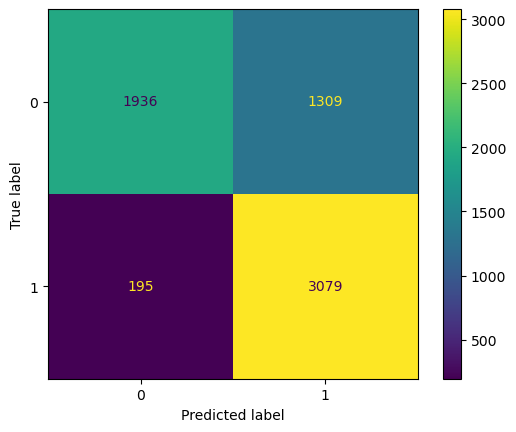

In [104]:
gbc=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, min_samples_split= 5, n_estimators=200)
gbc.fit(x_train,y_train)
y_testpred=gbc.predict(x_test)
y_trainpred=gbc.predict(x_train)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbth=accuracy_score(y_test,y_testpred)*100
gbrh=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbth)
print('Train accuracy:',gbrh)

# PERFORMANCE AFTER HYPER PARAMETER TUNNING

In [105]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt','xgb','sv'])
tb['test_accuracy']=pd.Series([knnth,lrth,gbth,rfth,adth,gbth,dtth,xgth,svth])
tb['train_accuracy']=pd.Series([knnrh,lrrh,gbrh,rfrh,adrh,gbrh,dtrh,xgrh,svrh])
tb

model  test_accuracy  train_accuracy
0       knn      73.676944      100.000000
1        lr      56.603774       55.770903
2        gb      76.928977       76.788545
3        rf      78.125479      100.000000
4  adaboost      73.876361       74.083355
5       gbc      76.928977       76.788545
6        dt      67.326277       67.036564
7       xgb      76.852278       76.732294
8        sv      72.787237       95.781130

In [106]:
import joblib

In [107]:
import joblib
joblib.dump(rf,'Dry_Eye_Dataset.pkl')

['Dry_Eye_Dataset.pkl']

In [108]:
joblib.dump(sc,'scaler.pkl')

['scaler.pkl']

In [109]:
joblib.dump(le0,'le0.pkl')

['le0.pkl']

In [110]:
joblib.dump(le,'le.pkl')

['le.pkl']

In [111]:
joblib.dump(le1,'le1.pkl')

['le1.pkl']

In [112]:
joblib.dump(le2,'le2.pkl')

['le2.pkl']

In [113]:
joblib.dump(le3,'le3.pkl')

['le3.pkl']

In [114]:
joblib.dump(le4,'le4.pkl')

['le4.pkl']

In [115]:
joblib.dump(le5,'le5.pkl')

['le5.pkl']

In [116]:
joblib.dump(le6,'le6.pkl')

['le6.pkl']

In [117]:
joblib.dump(le7,'le7.pkl')

['le7.pkl']

In [118]:
joblib.dump(le8,'le8.pkl')

['le8.pkl']

In [119]:
joblib.dump(le9,'le9.pkl')

['le9.pkl']

In [120]:
joblib.dump(le10,'le10.pkl')

['le10.pkl']

In [121]:
joblib.dump(le11,'le11.pkl')

['le11.pkl']

In [122]:
joblib.dump(le12,'le12.pkl')

['le12.pkl']

In [123]:
joblib.dump(le13,'le13.pkl')

['le13.pkl']